# Descriptors

## Libraries

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from matplotlib import gridspec

from glob import glob
from random import choice, shuffle

from skimage import io
from skimage import color
from skimage import transform
from skimage import feature
from skimage import filters
from skimage import morphology


from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Descriptors

There severa issues in image classification:
    
- localisation
- scale
- rotation
- shift
- occlusion
- deformable
- different points of view
- etc.

For example, let's look at those chairs :

![chairs](./imgs/chairs.jpg)

All of them are in the same class but looks very different...


Furthermore getting a nice dataset (like the car detection previously used) with all objects perfectly alligned is time and money consumming... 

The descriptors coupled with the _Bag of Words_ approach will help us to solve some of those problem and was used for longtime (and some people still use it !)
This technic doesn't need this kind on dataset.
With only the images and a label (contains the object or not) it can still learn with the previous constraints !
You just need good desciptors!


### SIFT

Let's talk first to the most popular patch descriptor : _SIFT_.

The SIFT is made in two majors steps:

1. keypoints detection
2. keypoints description

![sift](./imgs/1*K68boX7fmtsYmyG2LlcmhQ.jpeg)

The keypoints detection is an interresting part because it solve the scale and rotation problems.
The keypoints description is globally the same.

To get the intution about SIFT look at [this](https://www.youtube.com/watch?v=U0wqePj4Mx0) quick video or, better, read the [paper](https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf) ! 

### Exploration with SKImage

Like SIFT, ORB can do both : extraction and description... let's see how to use a feature descriptor with skimage...

Some others extractors/descriptors are available in skimage (like [BRIEF](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.BRIEF)).

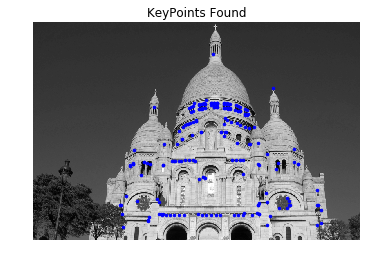

[1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0
 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1
 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1]
This descirptor return a binary descrition about the image,
for more information about how it woks take a look to the documentation...


In [2]:
im = io.imread("imgs/sc.jpg", as_grey=True)

#detect keypoints
descriptor_extractor = feature.ORB(n_keypoints=200)
descriptor_extractor.detect_and_extract(im)
keypoints   = descriptor_extractor.keypoints

#extract description from those detected keypoints
descriptors = descriptor_extractor.descriptors

#show result
plt.title("KeyPoints Found")
plt.axis("off")
plt.imshow(im, interpolation='nearest', cmap='gray')
plt.plot(keypoints[:, 1], keypoints[:, 0], '.b', markersize=5)
plt.show()

#look how ORB describe keypoints
print(np.array(descriptors[0], dtype=int))

print("This descirptor return a binary descrition about the image,")
print("for more information about how it woks take a look to the documentation...")

## Bag Of Words

***TODO: explain bag of word***

![bag of word](./imgs/bag-of-words-models-for-visual-categorization-gil039s-cv-blog-bag-of-visual-words-l-0f88e882f4587d79.jpg)

Let's do a simple image classifier (boat vs plane) with the _**B**ag **o**f **W**ords_ technique.

Here we will not use a complex descriptor and only randomly sample patches from the image to learn the dictionnary.

In [3]:
boats_im_path  = glob("imgs/boat/s*")
planes_im_path = glob("imgs/aircraft/s*")

len(boats_im_path), len(planes_im_path)

(316, 316)

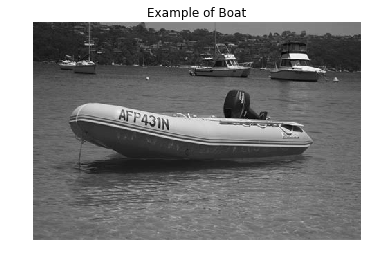

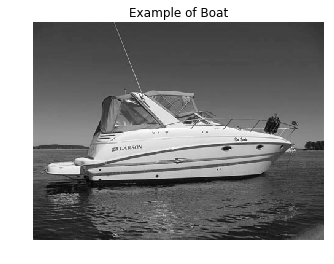

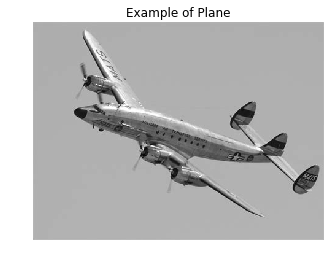

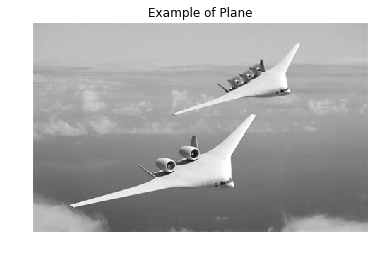

In [4]:
plt.title("Example of Boat")
plt.axis("off")
plt.imshow(io.imread(boats_im_path[0], as_grey=True), cmap='gray')
plt.show()

plt.title("Example of Boat")
plt.axis("off")
plt.imshow(io.imread(boats_im_path[1], as_grey=True), cmap='gray')
plt.show()


plt.title("Example of Plane")
plt.axis("off")
plt.imshow(io.imread(planes_im_path[0], as_grey=True), cmap='gray')
plt.show()

plt.title("Example of Plane")
plt.axis("off")
plt.imshow(io.imread(planes_im_path[1], as_grey=True), cmap='gray')
plt.show()

In [5]:
def load_img(im_path):
    im = io.imread(im_path, as_gray=True)
    return im

In [6]:
boats  = list(map(load_img, boats_im_path))
planes = list(map(load_img, planes_im_path))

In [7]:
def random_sample_window(img, window_size=16, normalize=True):
    x = np.random.randint(0, img.shape[0] - window_size - 1)
    y = np.random.randint(0, img.shape[1] - window_size - 1)
    patch = img[x:x+window_size, y:y+window_size]
    if normalize:
        (patch - patch.mean()) / patch.std()
    return patch

In [8]:
#extract random patches to make a visual words dictionnary
patches = [random_sample_window(choice(boats),  16, True).flatten() for i in range(1000)] +\
          [random_sample_window(choice(planes), 16, True).flatten() for i in range(1000)]

In [9]:
#make vector quantization to build a visual dictionnary with kmean
quantizer = KMeans(100) #nb of visual words
quantizer.fit(patches)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
def build_visual_words_histogram(img, quantizer, nb_random_patches=500):
    h = [0] * len(quantizer.cluster_centers_)
    p = [random_sample_window(img, 16, normalize=True).flatten() for i in range(nb_random_patches)]
    c = quantizer.predict(p)
    for v in c:
        h[int(v)] += 1
    return np.array(h) / float(sum(h))


In [11]:
#compute the visual histograms from the sampled patches to describe the images
boat_histograms  = list(map(lambda im: build_visual_words_histogram(im, quantizer), boats))
plane_histograms = list(map(lambda im: build_visual_words_histogram(im, quantizer), planes))

In [12]:
labels = [1] * len(boat_histograms) + [0] * len(plane_histograms)

In [13]:
#shuffle and split data
data = list(zip(boat_histograms + plane_histograms, labels))

shuffle(data)

data_x, data_y = zip(*data)

train_x = data_x[:int(len(data_x) * .8)]
train_y = data_y[:int(len(data_x) * .8)]

test_x = data_x[int(len(data_x) * .8):]
test_y = data_y[int(len(data_x) * .8):]

In [14]:
clf = LogisticRegression()
clf.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
print("Accuracy : {0:.2f}%".format((clf.predict(test_x) == test_y).mean() * 100))

Accuracy : 63.78%


**Exercice**: _from the weights learnt by the classifier, try to find wich visual words are usefull to classify the planes..._
    
(tip. look at the high negative weights for the plane and high positive weights for the boats)

**Exercice**: _show which part of the image is involved in the decision..._

_Does this could help to localise the object ?_

**Exercice**: _try to improve scores by varying classifiers (and parameters), the numbers of visual words, more patches and using a "real" descriptor like SIFT (bacause our random sampled keypoints could be improved and our description of those keypoints is not scale and rotation invariant !)..._
    
_What's your best method ?_